<a href="https://colab.research.google.com/github/AbdurRafiq/Machine-Learning-Algorithms-With-Python/blob/master/LogisticRegression_Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
df = pd.read_csv("/content/framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [7]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


In [8]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

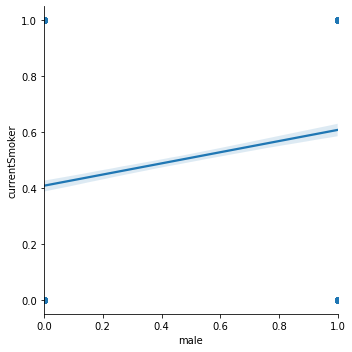

In [10]:
sns.lmplot(x="male",y="currentSmoker",data=df);

In [11]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [12]:
df.shape

(4238, 16)

In [13]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [0]:
df['education'] = df['education'].fillna( df['education'].dropna().mode().values[0] )
df['cigsPerDay'] = df['cigsPerDay'].fillna( df['cigsPerDay'].dropna().mode().values[0] )
df['glucose'] = df['glucose'].fillna( df['glucose'].dropna().mode().values[0] )
df['totChol'] = df['totChol'].fillna( df['totChol'].dropna().mode().values[0] )
df['BMI'] = df['BMI'].fillna( df['BMI'].dropna().mode().values[0] )
df['BPMeds'] = df['BPMeds'].fillna( df['BPMeds'].dropna().mode().values[0] )
df['cigsPerDay'] = df['cigsPerDay'].fillna( df['cigsPerDay'].dropna().mode().values[0] )
df['heartRate'] = df['heartRate'].fillna( df['heartRate'].dropna().mode().values[0] )

In [15]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [0]:
graph_1 = df.groupby("education", as_index=False).cigsPerDay.mean()

(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]),
 <a list of 10 Text major ticklabel objects>)

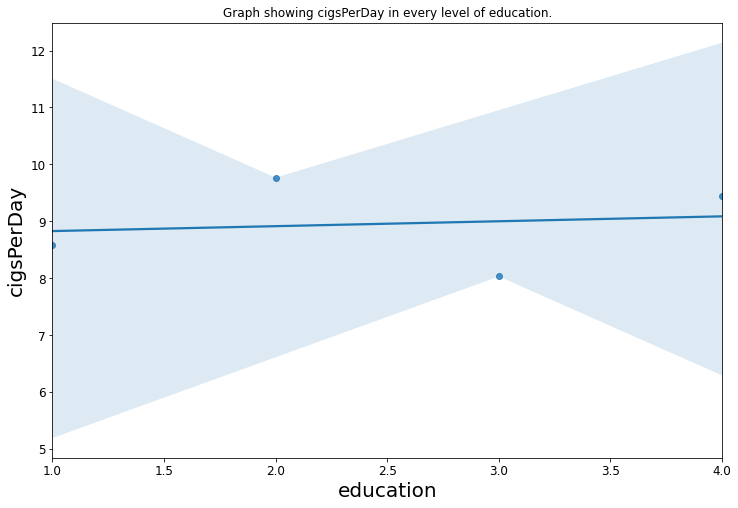

In [17]:
plt.figure(figsize=(12,8))
sns.regplot(x=graph_1["education"], y=graph_1["cigsPerDay"])
plt.title("Graph showing cigsPerDay in every level of education.")
plt.xlabel("education", size=20)
plt.ylabel("cigsPerDay", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

# Which age group has more smokers

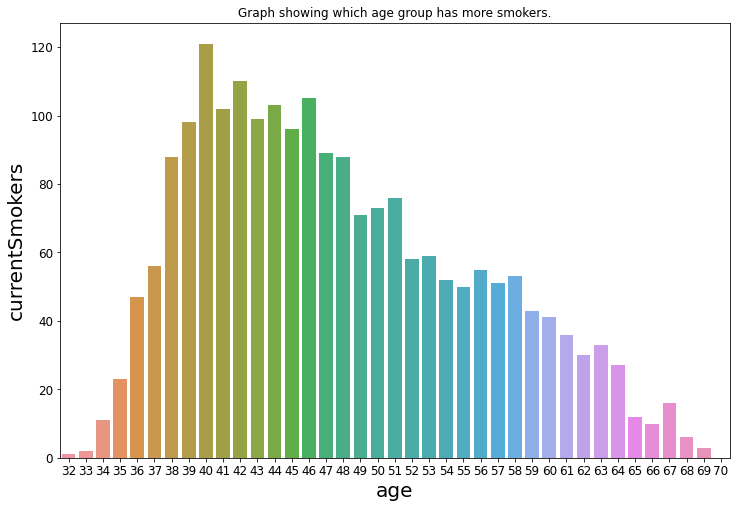

In [18]:

graph_7 = df.groupby("age",as_index=False).currentSmoker.sum()

plt.figure(figsize=(12,8))
sns.barplot(x=graph_7["age"], y=graph_7["currentSmoker"])
plt.title("Graph showing which age group has more smokers.")
plt.xlabel("age", size=20)
plt.ylabel("currentSmokers", size=20)
plt.xticks(size=12);
plt.yticks(size=12);

In [19]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [0]:
X = df.drop("TenYearCHD",axis = 1)

y = df["TenYearCHD"]

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [0]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

# defining the model

model = LogisticRegression(random_state=3, max_iter=100000)

In [23]:

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
model.score(X_test,y_test)

0.8655660377358491

In [25]:
cross_val_score(model,X,y,cv = 5)

array([0.85259434, 0.85377358, 0.85141509, 0.86068477, 0.85005903])

In [27]:
np.random.seed(42)

# Single traing and test split score
model_single_score = model.score(X_test,y_test)

# Take the mean of 5 -flod cross-validation score

model_cross_val_score = np.mean(cross_val_score(model,X,y,cv = 5))


#compare the two 

model_single_score,model_cross_val_score

(0.8655660377358491, 0.8537053641041634)

In [28]:
y_preds = model.predict(X_test)
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [29]:
y_test.head(20)

4191    0
3015    0
2305    0
1221    0
1028    1
4137    0
228     0
3245    0
218     0
59      1
2901    0
4114    0
4044    0
2572    0
752     1
605     0
2359    0
3748    0
3505    1
86      0
Name: TenYearCHD, dtype: int64

# Evaluate the model

In [30]:
model.score(X_train,y_train)

0.8530973451327434

In [31]:
model.score(X_test,y_test)

0.8655660377358491

In [32]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       732
           1       0.58      0.06      0.11       116

    accuracy                           0.87       848
   macro avg       0.73      0.53      0.52       848
weighted avg       0.83      0.87      0.82       848



In [33]:
confusion_matrix(y_test,y_preds)

array([[727,   5],
       [109,   7]])

In [34]:
accuracy_score(y_test,y_preds)

0.8655660377358491

In [36]:
# 5. improve model

# try different amount of n_estimators

np.random.seed(42)

for i in range (10,100,10):
    print(f"Trying model with {i} estimators.....")
    model = LogisticRegression().fit(X_train,y_train)
    print(f"Model Accuracy on test set: {model.score(X_test,y_test) * 100:.2f}%")

Trying model with 10 estimators.....
Model Accuracy on test set: 86.08%
Trying model with 20 estimators.....
Model Accuracy on test set: 86.08%
Trying model with 30 estimators.....


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Model Accuracy on test set: 86.08%
Trying model with 40 estimators.....
Model Accuracy on test set: 86.08%
Trying model with 50 estimators.....
Model Accuracy on test set: 86.08%
Trying model with 60 estimators.....


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Model Accuracy on test set: 86.08%
Trying model with 70 estimators.....
Model Accuracy on test set: 86.08%
Trying model with 80 estimators.....


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Model Accuracy on test set: 86.08%
Trying model with 90 estimators.....
Model Accuracy on test set: 86.08%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [37]:
from sklearn.metrics import roc_curve

# Fit the classifier
model.fit(X_train, y_train)

# Make predictions with probabilities

y_probs = model.predict_proba(X_test)

y_probs[:10], len(y_probs)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(array([[0.89289856, 0.10710144],
        [0.87381777, 0.12618223],
        [0.652345  , 0.347655  ],
        [0.86537031, 0.13462969],
        [0.73033366, 0.26966634],
        [0.95119915, 0.04880085],
        [0.90309026, 0.09690974],
        [0.65327817, 0.34672183],
        [0.83349144, 0.16650856],
        [0.92098778, 0.07901222]]), 848)

In [38]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.10710144, 0.12618223, 0.347655  , 0.13462969, 0.26966634,
       0.04880085, 0.09690974, 0.34672183, 0.16650856, 0.07901222])

In [39]:
# Caculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.00409836, 0.00409836, 0.0068306 ,
       0.0068306 , 0.01229508, 0.01229508, 0.0136612 , 0.0136612 ,
       0.02185792, 0.02185792, 0.02868852, 0.02868852, 0.03142077,
       0.03142077, 0.03825137, 0.03825137, 0.04371585, 0.04371585,
       0.06284153, 0.06284153, 0.06420765, 0.06420765, 0.06967213,
       0.06967213, 0.07377049, 0.07377049, 0.07513661, 0.07513661,
       0.08606557, 0.08606557, 0.08743169, 0.08743169, 0.09153005,
       0.09153005, 0.09836066, 0.09836066, 0.11065574, 0.11065574,
       0.11202186, 0.11202186, 0.11612022, 0.11612022, 0.11748634,
       0.11748634, 0.14344262, 0.14344262, 0.15437158, 0.15437158,
       0.16530055, 0.16530055, 0.16666667, 0.16666667, 0.17076503,
       0.17076503, 0.17349727, 0.17349727, 0.18169399, 0.18169399,
       0.18306011, 0.18306011, 0.21174863, 0.21174863, 0.21448087,
       0.21448087, 0.21721311, 0.21721311, 0.21857923, 0.21857923,
       0.22540984, 0.22540984, 0.24590164, 0.24590164, 0.25273

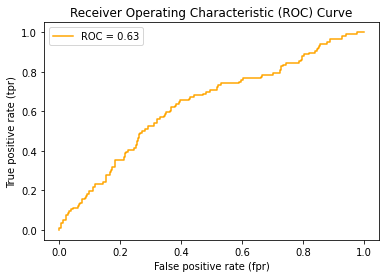

In [42]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC = 0.63")
    # Plot line with no predictive power (baseline)
    #plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [41]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.6321014697569249